In [0]:
#Joshua Alvarado
#06/06/2020
#Josh.alvarado0328@gmail.com

#Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import time
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Twitter Api Credentials

Consumer_Key = "aFtN4QfJdqjk0GmxxRSiNtGhN"

Consumer_Secret_Key = "4xwCeig9D0tuDSyTo3goeYwqryQhHIelZPbBmcn3N6aKyb38Nn"

Access_Token = "1218311228344242176-D346wVdG6DWFI3vrg3F12pypWNj9ST"

Access_Token_Secret = "y3IB5zWGIJ5Yyy6XRSJVRTZmIDkj5A578n2TSEadfPDss"

#uthenticating Keys

auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)

auth.set_access_token(Access_Token,Access_Token_Secret)

api = tweepy.API(auth, wait_on_rate_limit= True,parser=tweepy.parsers.JSONParser())

#Target term which is the the bot @name
target_term="@FindSentiment"



In [0]:
def create_visuals(mentioned):
    #Extract 100 tweets from user
    print("In create_visuals")
    if "#" in mentioned:
      posts = api.search(mentioned, count=5, result_type="recent", tweet_mode="extended")
      for tweet in posts["statuses"]:
        tweet_text = tweet['full_text']
        print(tweet_text)
        print(type(posts))
    else:
      posts = api.user_timeline(screen_name=mentioned, count=5, lang= "en",tweet_mode="extended")
      print("this is the type Vv")
      print(posts)
      print(type(posts))
      print("Got the user tweets")



    # Print last 5 recent tweets
    print("Show the 5 recent tweets: \n")
    i=1
    for tweet in posts[0:5]:
      print(str(i)+') ' + tweet["full_text"] + "\n")
      i = i + 1

    #Create a dataframe with a columb called tweets
    df = pd.DataFrame( [tweet["full_text"] for tweet in posts], columns=['tweets'])

    #show the first 5 rows of data
    df.head()

    #Clean the text

    #Create a function to clean the tweets
    def cleanTxt(text):
      text = re.sub(r'@[\w:]+', '', text) #removes @mentions
      text = re.sub(r'#','',text) #removing # symbol
      text = re.sub(r'RT[\s]+','',text) #removes retweets
      text = re.sub(r'https?:\/\/\S+','', text) #remove hyperlinks
      return text

    df['tweets'] = df['tweets'].apply(cleanTxt)

    #Show the cleaned text
    df

    # Create a function to get the subjectivity
    def getSubjectivity(text):
      return TextBlob(text).sentiment.subjectivity

    # Create a function to get the polarity
    def getPolarity(text):
      return TextBlob(text).sentiment.polarity

    # Create two new columns
    df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
    df['Polarity'] = df['tweets'].apply(getPolarity)

    # Show the new dataframe with the new columns

    # Plot the Word Cloud

    allWords = ' '.join([twts for twts in df ['tweets']])
    wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size=119,).generate(allWords)

    plt.imshow(wordCloud, interpolation = "bilinear")
    plt.axis('off')
    plt.title('Most common words for ' + mentioned)
    plt.savefig('wordcloud.png',bbox_inches='tight',dpi=600)
    plt.show()

    #Create a function to compute the negative, neutral and positive analysis
    def getAnalysis(score):
      if score < 0:
        return 'Negative'
      elif score == 0:
        return 'Neutral'
      else:
        return 'Positive'

    df['Analysis'] = df['Polarity'].apply(getAnalysis)

    df

    # Print all of the positive tweets
    j=1
    sortedDF = df.sort_values(by=['Polarity'])
    for i in range (0, sortedDF.shape[0]):
      if(sortedDF['Analysis'][i] == 'Neutral'):
        print(str(j) + ')' + sortedDF['tweets'][i])
        print()
        j = j+1

    # Print negative tweets
    j=1
    sortedDF = df.sort_values(by=['Polarity'], ascending='False')
    for i in range (0, sortedDF.shape[0]):
      if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sortedDF['tweets'][i])
        print()
        j = j+1

    # Plot the polarity and subjectivity 
    plt.figure(figsize=(8,6))
    for i in range(0, df.shape[0]):
      plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='blue')
      
    plt.title('Sentiment Analysis for ' + mentioned)
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.savefig('plot.png',bbox_inches='tight',dpi=600)
    plt.show()

    # Get the percentage of positive tweets 

    ptweets = df[df.Analysis == 'Positive']
    ptweets = ptweets['tweets']

    ##round( (ptweets.shape[0] / df.shape[0]) *100, 1)

    # Get the percentage of negative tweets 

    ntweets = df[df.Analysis == 'Negative']
    ntweets = ntweets['tweets']

   ## round( (ntweets.shape[0] / df.shape[0]) *100, 1)

    # Get the percentage of negative tweets 

    Neutraltweets = df[df.Analysis == 'Neutral']
    Neutraltweets = Neutraltweets['tweets']

   ## round( (Neutraltweets.shape[0] / df.shape[0]) *100, 1)

    # show the value counts

    df['Analysis'].value_counts()

    # plot and visualize the counts

    plt.title('Sentiment Analysis for ' + mentioned)
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    df['Analysis'].value_counts().plot(kind='bar')
    plt.savefig('graph.png',bbox_inches='tight',dpi=600)
    plt.show()



1270933399348232193
Unbaptizedd
 @keemstar
It has a mention
@keemstar
In create_visuals
this is the type Vv
[{'created_at': 'Thu Jun 11 03:00:59 +0000 2020', 'id': 1270913893163040769, 'id_str': '1270913893163040769', 'full_text': 'Congrats @aydan &amp; @FF_MuTeX \n\nWinning week 9 #WarZoneWednesdays !!!', 'truncated': False, 'display_text_range': [0, 71], 'entities': {'hashtags': [{'text': 'WarZoneWednesdays', 'indices': [49, 67]}], 'symbols': [], 'user_mentions': [{'screen_name': 'aydan', 'name': 'Aydan', 'id': 275652453, 'id_str': '275652453', 'indices': [9, 15]}, {'screen_name': 'FF_MuTeX', 'name': 'MuTeX', 'id': 744515922, 'id_str': '744515922', 'indices': [22, 31]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 872683897, 'id_str': '872683897',

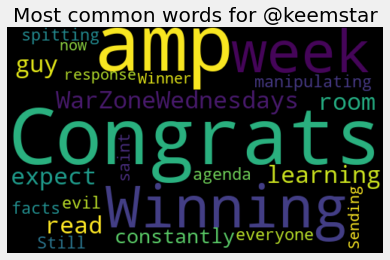

1)   He’s learning how to read the room.

2) Still no response....

3)Winner! Sending now!  

1)   What do you expect from a guy who is constantly manipulating facts and spitting an agenda where everyone against him is evil and he is a saint.

something went wrong


SystemError: ignored

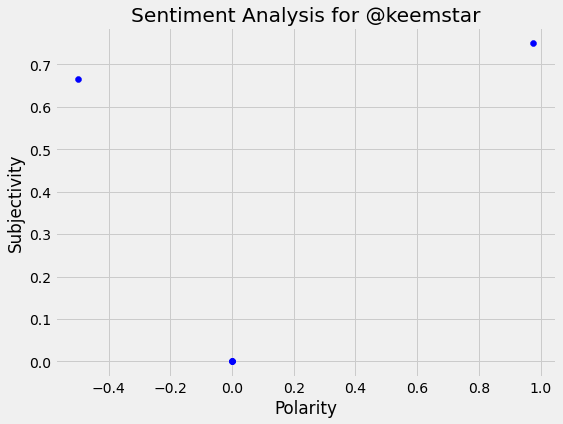

In [28]:
def start(): 
  global mentioned
  global tweet_id
  global handle
  public_tweets = api.search(target_term, count=1, result_type="recent")
  for tweet in public_tweets["statuses"]:
  # Get ID and Author of most recent tweet directed to me
    tweet_id = tweet["id"]
    handle = tweet["user"]["screen_name"] 
    text = tweet["text"]
    text = re.sub(r'@findsentiment','',text.lower())
    print(tweet_id)
    print(handle)
    print(text)
    if "#" in text:
      print("it has a hashtag")
      text = re.findall('[@#][^\s]+', text)[0]
      mentioned = text
      print(mentioned)
      tweetit()
    elif '@' in text:
      print("It has a mention")
      text = re.findall('[@#][^\s]+', text)[0]
      mentioned = text
      print(mentioned)
      tweetit()
    else:
      print("it has nothing")
      handle = handle
      mentioned = handle
      tweetit()


def tweetit():
  try:
    create_visuals(mentioned)
    images = ('graph.png', 'wordcloud.png','plot.png')
    test = [api.media_upload(i) for i in images]
    print(test)
    media_ids = [api.media_upload(i)['media_id_string'] for i in images]
    print("I should have images ")
    api.update_status(
                      "@%s thank you for using FindSentiment! Heres your data!" %
                      handle, media_ids=media_ids,
                      in_reply_to_status_id=tweet_id)
    print("WE DID IT SUCCESS!")
  except Exception:
    print("something went wrong")
    raise
  print("We're done for now. I'll check again in 60 seconds.")

while(True):
  start()
  time.sleep(1000)
    
